In [1]:
# Master File for Offline Studies on Muon System LLP Decays (sans clustering)

# Coders: Nathan Suri, Caltech; Cristian Pena, Caltech/Fermilab
# Date: July 2019
# LPC LLP Group

# Description
# Meant for testing WH

# Action Plan
#

# Notes/Conclusions
# @nasurijr: Barrel acceptance (theoretical rationale, data supports acceptance trend)

In [2]:
# User specifics
# Setups pwd location for data files and imports of special ROOT utilities

work_location = input("Username: ")
if work_location == 'nasurijr':
    pwd = '/nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/'
    
    # Sets display width
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:85% !important; }</style>"))
    
# elif work_location == '<Insert Tier2 username here>':
#     pwd = '/home/cms/delayed_jet_analyzer/'

Username: nasurijr


# Imports

In [3]:
# Imports necessary utilities and modules

import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

# Graph/histo utilities from ROOT
# Contained within the delayed_jet_analyzer repository
import sys
sys.path.append(pwd+'lib')
from histo_utilities import create_TH1D, create_TH2D, create_TGraph, std_color_list

# Used for extracting the TTree structure from each datafile
import os
import uproot

donotdelete = []

Welcome to JupyROOT 6.18/00


# Read in and Extract TTrees from Datafiles

In [6]:
# Setups dictionaries for storing data from MC/data ntuples
fpath = {}
tree = {}

data_path = pwd+'data/'

# Background Samples

# ggH-comparable background: QCD
fpath['qcd'] = data_path +'jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root'

# Currently not needed for the analysis
# # Small subset of B samples for quick runs/tests
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018B_112_dec.root'
# # # Complete set of A and B ZeroBias samples (time-intensive to run)
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018AB_complete.root'

# WH-comparable background: WJetsToLNu
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8.root'
fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV_setQ5_1.root'

################################################################

# Signal Samples
# wH
# mH = 125 GeV, mX = 50 GeV, ctau = 1 m
fpath['m50ct1000mm'] = data_path + 'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl1000.root'

# mH = 125 GeV, mX = 50 GeV, ctau = 10 m
fpath['m50ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl10000.root'

# mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
fpath['m975ct1000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl1000.root'

# mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
fpath['m975ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl10000.root'

# ggH
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl1000_ev100000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl10000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl1000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl10000_ev100000.root'

# Iterates through each file and extracts the ROOT TTree structure from each
for k,v in fpath.items():
    print(str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    print(k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['ntuples']['llp']
    # Accesses the array form of the jetPt branch
#     a = tree[k]["jetPt"].array()
#     print(a[:-1][0])

2019-07-31 16:39:02.913301-07:00
qcd /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root
2019-07-31 16:39:03.061911-07:00
WJetsToLNu /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV_setQ5_1.root
2019-07-31 16:39:03.224585-07:00
m50ct1000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl1000.root
2019-07-31 16:39:03.514176-07:00
m50ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl10000.root
2019-07-31 16:39:03.700747-07:00
m975ct1000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl1000.root
2019-07-31 16:39:03.884080-07:00
m975ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl10000.root


## Name TTree Objects

In [7]:
# Bookkeeping: Defines the TTrees from the read datafiles
# Names displayed in README.md table

T = tree['m50ct1000mm']
T_bkg = tree['WJetsToLNu']
# T_minBias = tree['zeroBias']
T_low_ctau10 = tree['m50ct10000mm']
T_high_ctau1 = tree['m975ct1000mm']
T_high_ctau10 = tree['m975ct10000mm']

# T_wh = tree['wh_m50ct1000mm']
# T_bkg = tree['WJetsToLNu']

## Jet Pt Calculations

In [8]:
#get first jet pt per event
first_jet_pt = [x[0] if len(x) else -1 for x in T['jetPt'].array()]

#get max jet pt per event
max_jet_pt = [np.max(np.abs(x)) if len(x) else -1 for x in T['gLLP_decay_vertex_z'].array()]

#store jet-pt array per event in a list
first_jet_pt_arr = []
for x in T['jetPt'].array():
    if len(x) == 0:
        break
    first_jet_pt_arr.append(x[0])

# Define Variables and Name Datafiles 

In [48]:
# Variable Definitions
# Creates dictionaries for variables to be analyzed
# The dictionaries will contain the variable arrays for each datafile with a relevant key

# CSC
nCsc = {}
csc_z = {}
csc_x = {}
csc_y = {}
csc_eta = {}
csc_phi = {}
csc_t = {}

# Gen Level
gLLP_eta = {}
gLLP_r = {}
gLLP_decay = {}
eventNum_endcap = {}
lumiNum_endcap = {}
eventNum_barrel = {}
lumiNum_barrel = {}
eventNum_bkg = {}
lumiNum_bkg = {}
ncsc_barrel = {}
gLLPr = {}

# Drift Tube (DT)
nDt = {}
dt_phi = {}
dt_eta = {}
dt_z = {}
dt_x = {}
dt_y = {}
# RPC
nRpc = {}
rpc_phi = {}
rpc_eta = {}
rpc_z = {}
rpc_x = {}
rpc_y = {}

In [49]:
# Bookkeeping: Creates a dictionary for iterating over all of the datafiles and 
#              converting the relevant branches to numpy arrays
# Names displayed in README.md table

# data_trees = {'m50ct1m': T, 'qcd': T_bkg, 'zeroBias':T_minBias, 'm50ct10m': T_low_ctau10, 'm975ct1m': T_high_ctau1, 'm975ct10m': T_high_ctau10, 'wh_m50ct1m': T_wh, 'WJetsToLNu': T_w_bkg}
data_trees = {'m50ct1m': T, 'm50ct10m': T_low_ctau10, 'm975ct1m': T_high_ctau1, 'm975ct10m': T_high_ctau10, 'WJetsToLNu': T_bkg}

# Event Selection

In [50]:
# print(T_bkg['nCsc'].array())

# # for ev in range(len(T_wh['nCsc'].array())):
# gParticleMotherId = T_wh['gParticleMotherId'].array()
# gParticleId = T_wh['gParticleId'].array()
# gParticleStatus = T_wh['gParticleStatus'].array()
# # print(gParticleId)
# counter = 0
# # print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24)))
# ele_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# mu_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 11, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# for ev in np.logical_or(ele_sel, mu_sel):
#     if ev.any():
#         counter +=1
# print(counter)
# print(len(gParticleId))
# print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 ))

## TBranch -> np.array() Conversion

In [51]:
# Event Selection

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

# MET+bb Final State
if 'metbb' in fpath['m50ct1000mm'] or 'vh' in fpath['m50ct1000mm']:
    for species, arbor in data_trees.items():
        if 'vh' in fpath['m50ct1000mm']:
                # Basic implementation: Loop through files and compile Boolean array with 1 muon/electron
                ele_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 13, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
                mu_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 11, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
    #             if not ((np.count_nonzero(mu) ==1 or np.count_nonzero(ele)==1)): continue
                sel_lepton = []
                time_counter = 0
                for ev in np.logical_or(ele_sel, mu_sel):
                    time_counter += 1
                    if (time_counter % 100000) == 0:
                        print(str(time_counter) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
                    if ev.any():
                        sel_lepton.append(True)
                    else:
                        sel_lepton.append(False)
                        
        if species in ('m50ct1m', 'm50ct10m', 'm975ct1m', 'm975ct10m'):
            gLLP_r[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
            gLLP_decay[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2 + (arbor['gLLP_decay_vertex_z'].array()[:,0])**2)

            # Endcap Signal Event Selection: Requires that the bb-decaying LLP decays within the endcap of the muon system        
            sel_csc = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
            sel_csc = np.logical_and(sel_csc, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
            sel_csc = np.logical_and(sel_csc, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
            sel_csc = np.logical_and(sel_csc, np.absolute(gLLP_r[species])<695.5)

            # Barrel Signal Event Selection: Requires that the bb-decaying LLP decays within the barrel of the muon system        
            sel_barrel = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > -661 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 661)
            sel_barrel = np.logical_and(sel_barrel, np.absolute(gLLP_r[species])<738)
            sel_barrel = np.logical_and(sel_barrel, np.absolute(gLLP_r[species])>380)

            # Overlap Signal Event Selection: Requires that the bb-decaying LLP decays within the overlap of the barrel
            #                                 and endcap of the muon system
            sel_rpc = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 0 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
            sel_rpc = np.logical_and(sel_rpc, np.absolute(arbor['gLLP_eta'].array()[:,0])<1.6)
            sel_rpc = np.logical_and(sel_rpc, np.absolute(gLLP_r[species])<738)
            sel_rpc = np.logical_and(sel_rpc, np.absolute(gLLP_r[species])>275)

            # Total Muon System Signal Event Selection: Logical or of barrel and endcap gen-level restrictions
            sel_dis_signal = np.logical_or(sel_csc, sel_barrel)
        
            
            if 'vh' in fpath['m50ct1000mm']:    
                sel_csc = np.logical_and(sel_csc, sel_lepton)
                sel_barrel = np.logical_and(sel_barrel, sel_lepton)
                sel_rpc = np.logical_and(sel_rpc, sel_lepton)
#             print(len(sel_lepton))
#         break
        # Converts variable branches to numpy arrays with event selection
        # Signal conversions
#         if species in ('m50ct1m', 'm50ct10m', 'm975ct1m', 'm975ct10m'):
            # Endcap: CSCs
            nCsc[species] = arbor['nCsc'].array()[sel_csc]
            csc_z[species] = arbor['cscZ'].array()[sel_csc]
            csc_x[species] = arbor['cscX'].array()[sel_csc]
            csc_y[species] = arbor['cscY'].array()[sel_csc]
            csc_t[species] = arbor['cscT'].array()[sel_csc]
            csc_eta[species] = arbor['cscEta'].array()[sel_csc]
            csc_phi[species] = arbor['cscPhi'].array()[sel_csc]
            
            # Gen-level
            gLLP_eta[species] = arbor['gLLP_eta'].array()[:,0][sel_csc]
            eventNum_endcap[species] = arbor['eventNum'].array()[sel_csc]
            lumiNum_endcap[species] = arbor['lumiNum'].array()[sel_csc]
            
            eventNum_barrel[species] = arbor['eventNum'].array()[sel_barrel]
            lumiNum_barrel[species] = arbor['lumiNum'].array()[sel_barrel]
            gLLPr[species] = gLLP_r[species][sel_barrel]
            ncsc_barrel = arbor['nCsc'].array()[sel_barrel]
            
            # Barrel: DTs
            nDt[species] = arbor['nDt'].array()[sel_barrel]
            dt_z[species] = arbor['dtZ'].array()[sel_barrel]
            dt_x[species] = arbor['dtX'].array()[sel_barrel]
            dt_y[species] = arbor['dtY'].array()[sel_barrel]
            dt_eta[species] = arbor['dtEta'].array()[sel_barrel]
            dt_phi[species] = arbor['dtPhi'].array()[sel_barrel]
            
            # Overlap: RPCs
            nRpc[species] = arbor['nRpc'].array()[sel_rpc]
            rpc_z[species] = arbor['rpcZ'].array()[sel_rpc]
            rpc_x[species] = arbor['rpcX'].array()[sel_rpc]
            rpc_y[species] = arbor['rpcY'].array()[sel_rpc]
            rpc_eta[species] = arbor['rpcEta'].array()[sel_rpc]
            rpc_phi[species] = arbor['rpcPhi'].array()[sel_rpc]
        
        # Background conversions
        if species in ('qcd', 'zeroBias', 'WJetsToLNu'):
            # Background event selection: Requires at least one jet per event to have pT > 50 GeV
            sel_bkg = [True if np.any(x > 50) else False for x in arbor['jetPt'].array()]
            if 'vh' in fpath['m50ct1000mm']:
                sel_bkg = np.logical_and(sel_bkg, sel_lepton)
            
            # Endcap: CSCs
            nCsc[species] = arbor['nCsc'].array()[sel_bkg]
            csc_z[species] = arbor['cscZ'].array()[sel_bkg]
            csc_x[species] = arbor['cscX'].array()[sel_bkg]
            csc_y[species] = arbor['cscY'].array()[sel_bkg]
            csc_t[species] = arbor['cscT'].array()[sel_bkg]
            csc_eta[species] = arbor['cscEta'].array()[sel_bkg]
            csc_phi[species] = arbor['cscPhi'].array()[sel_bkg]
            gLLP_eta[species] = arbor['gLLP_eta'].array()[:,0][sel_bkg]
            
            # Gen-level
            eventNum_bkg[species] = arbor['eventNum'].array()[sel_bkg]
            lumiNum_bkg[species] = arbor['lumiNum'].array()[sel_bkg]
            
            # Barrel: DTs
            nDt[species] = arbor['nDt'].array()[sel_bkg]
            dt_z[species] = arbor['dtZ'].array()[sel_bkg]
            dt_x[species] = arbor['dtX'].array()[sel_bkg]
            dt_y[species] = arbor['dtY'].array()[sel_bkg]
            dt_eta[species] = arbor['dtEta'].array()[sel_bkg]
            dt_phi[species] = arbor['dtPhi'].array()[sel_bkg]
            
            # Overlap: RPCs
            nRpc[species] = arbor['nRpc'].array()[sel_bkg]
            rpc_z[species] = arbor['rpcZ'].array()[sel_bkg]
            rpc_x[species] = arbor['rpcX'].array()[sel_bkg]
            rpc_y[species] = arbor['rpcY'].array()[sel_bkg]
            rpc_eta[species] = arbor['rpcEta'].array()[sel_bkg]
            rpc_phi[species] = arbor['rpcPhi'].array()[sel_bkg]
        
        print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-07-31 17:11:56.430449-07:00
m50ct1m: 2019-07-31 17:11:58.798558-07:00
m50ct10m: 2019-07-31 17:12:01.453394-07:00
m975ct1m: 2019-07-31 17:12:02.472188-07:00
m975ct10m: 2019-07-31 17:12:03.710253-07:00
WJetsToLNu: 2019-07-31 17:12:06.247215-07:00


## Endcap Hit Removal

In [16]:
# Hit Removal
# For both the endcap and barrel regions (overlap to be determined), the closest stations to the beamspot are the noisiest.
# Thus, we remove the hits that land in these stations for each event in each datafile.

# Endcap
nCsc_station = {}
nCsc_removal = {}

# Loops over every datafile
for files in data_trees.keys():
    # Endcap
    nCsc_station[files] = {}
    nCsc_station[files]['ME_11'] = []
    nCsc_station[files]['ME_12'] = []
    nCsc_station[files]['ME_13'] = []
    
    # Loops over every event in each datafile
    for pos_bool in range(len(csc_z[files])):
        csc_r = np.sqrt(csc_x[files][pos_bool]**2+csc_y[files][pos_bool]**2)
        z_pos_bool = csc_z[files][pos_bool]
        
        counter_me11 = 0
        counter_me12 = 0
        counter_me13 = 0
        
        # Loops over every hit in each event
        for z_ind in range(len(z_pos_bool)):
            z_bool = np.absolute(z_pos_bool[z_ind])
            # ME 1/1 Constraints
            if z_bool > 568 and z_bool < 632:
                counter_me11 += 1
                
            if z_bool > 663 and z_bool < 724:
                # ME 1/2 Constraints
                if csc_r[z_ind] < 465 and csc_r[z_ind] > 275:
                    counter_me12 += 1
                # ME 1/3 Constraints
                if csc_r[z_ind] < 695.5 and csc_r[z_ind] > 505.5:
                    counter_me13 += 1
                    
        nCsc_station[files]['ME_11'].append(counter_me11)
        nCsc_station[files]['ME_12'].append(counter_me12)
        nCsc_station[files]['ME_13'].append(counter_me13)
    
    # nCsc dictionaries containing hits removed labelled by removed stations
    nCsc_removal[files] = {}
    nCsc_removal[files]['ME_11'] = np.array(nCsc[files]) - np.array(nCsc_station[files]['ME_11'])
    nCsc_removal[files]['ME_112'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']))
    nCsc_removal[files]['ME_1123'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']) + np.array(nCsc_station[files]['ME_13']))
    
    print(files + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

m50ct1m: 2019-07-31 16:41:33.630199-07:00
m50ct10m: 2019-07-31 16:41:34.153884-07:00
m975ct1m: 2019-07-31 16:41:34.187906-07:00
m975ct10m: 2019-07-31 16:41:35.374558-07:00
WJetsToLNu: 2019-07-31 16:41:41.461773-07:00


## Barrel Hit Removal

In [17]:
# Hit removal done identically to that of the endcap

# Barrel
nDt_station = {}
nDt_removal = {}

# Loops over every datafile
for files in data_trees.keys():
    # Barrel
    nDt_station[files] = {}
    nDt_station[files]['MB_1'] = []
    nDt_station[files]['MB_2'] = []
    nDt_station[files]['MB_3'] = []
    nDt_station[files]['MB_4'] = []
    
    # Loops over every event in each datafile
    for pos_bool in range(len(dt_z[files])):
        dt_r = np.sqrt(dt_x[files][pos_bool]**2+dt_y[files][pos_bool]**2)
        z_pos_bool = dt_z[files][pos_bool]
        
        counter_mb1 = 0
        counter_mb2 = 0
        counter_mb3 = 0
        counter_mb4 = 0
        
        # Loops over every hit in each event
        for z_ind in range(len(z_pos_bool)):
            z_bool = np.absolute(z_pos_bool[z_ind])
            if z_bool > -661 and z_bool < 661:
                
                # MB 1 Constraints
                if dt_r[z_ind] < 449 and dt_r[z_ind] > 402:
                    counter_mb1 += 1
                # MB 2 Constraints
                if dt_r[z_ind] < 533.5 and dt_r[z_ind] > 490.5:
                    counter_mb2 += 1
                # MB 3 Constraints
                if dt_r[z_ind] < 636 and dt_r[z_ind] > 597.5:
                    counter_mb3 += 1
                # MB 4 Constraints
                if dt_r[z_ind] < 738 and dt_r[z_ind] > 700:
                    counter_mb4 += 1
                    
        nDt_station[files]['MB_1'].append(counter_mb1)
        nDt_station[files]['MB_2'].append(counter_mb2)
        nDt_station[files]['MB_3'].append(counter_mb3)
        nDt_station[files]['MB_4'].append(counter_mb4)    
    
    # nDt dictionaries containing hits removed labelled by removed stations
    nDt_removal[files] = {}
    nDt_removal[files]['MB_1'] = np.array(nDt[files]) - np.array(nDt_station[files]['MB_1'])
    nDt_removal[files]['MB_12'] = np.array(nDt[files]) - (np.array(nDt_station[files]['MB_1']) + np.array(nDt_station[files]['MB_2']))
    
    print(files + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

m50ct1m: 2019-07-31 16:41:43.646550-07:00
m50ct10m: 2019-07-31 16:41:43.985185-07:00
m975ct1m: 2019-07-31 16:41:43.989172-07:00
m975ct10m: 2019-07-31 16:41:44.372205-07:00
WJetsToLNu: 2019-07-31 16:41:49.469751-07:00


## Calculation of Average Fraction of Hits per DT station

In [18]:
# Determines the evenness of hits distributed across the barrel DT stations by taking the average ratio of nDt for adjacent stations per event

nDt_avg_ratio = {}
nDt_ratio_cut = {}
    
for species in data_trees.keys():
    nDt_ratio_cut[species] = {}
    ratio_mb_12 = []
    ratio_mb_23 = []
    ratio_mb_34 = []
    for event in range(len(nDt_station[species]['MB_1'])):
        mb_12_comp = np.min((nDt_station[species]['MB_1'][event], nDt_station[species]['MB_2'][event]))/np.max((nDt_station[species]['MB_1'][event], nDt_station[species]['MB_2'][event]))
        ratio_mb_12.append(mb_12_comp)
        
        mb_23_comp = np.min((nDt_station[species]['MB_2'][event], nDt_station[species]['MB_3'][event]))/np.max((nDt_station[species]['MB_2'][event], nDt_station[species]['MB_3'][event]))
        ratio_mb_23.append(mb_23_comp)
        
        mb_34_comp = np.min((nDt_station[species]['MB_3'][event], nDt_station[species]['MB_4'][event]))/np.max((nDt_station[species]['MB_3'][event], nDt_station[species]['MB_4'][event]))
        ratio_mb_34.append(mb_34_comp)

    barrel_station_ratio = np.dstack((np.array(ratio_mb_12), np.array(ratio_mb_23), np.array(ratio_mb_34)))
    barrel_avg_ratio = np.mean(barrel_station_ratio, axis=2)
    nDt_avg_ratio[species] = barrel_avg_ratio
    sel_avg_ratio = nDt_avg_ratio[species][0]<7
    nDt_ratio_cut[species]['dt_inclusive'] = nDt[species][sel_avg_ratio]
    nDt_ratio_cut[species]['no_MB1'] = nDt_removal[species]['MB_1'][sel_avg_ratio]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less


## Calculations for N<sub>CSC, DT, RPC</sub> Threshold ROC Curves

In [20]:
print(nCsc['WJetsToLNu'])

[ 6  4  8 ... 17 15 19]


In [21]:
# Calculations for ROC Curves for ggH/QCD/ZeroBias Samples: nCsc/nDt/nRpc 

# Calculates efficiency by calculating the fraction of events that pass nCsc/nDt/nRpc thresholds

eff_ncsc = {}
eff_ndt = {}
eff_nrpc = {}
rejection_power = {}
ncsc_var_x = np.array([])
ndt_var_x = np.array([])

# Iterates over every datafile
for data_type in data_trees.keys():
    eff_ncsc[data_type] = {}
    eff_ndt[data_type] = {}
    eff_nrpc[data_type] = {}
      
    # No clustering: Endcap
    eff_ncsc[data_type]['noCluster'] = {}
    eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
    # No clustering: Barrel
    eff_ndt[data_type]['noCluster'] = {}
    eff_ndt[data_type]['noCluster_ratioCut'] = {}
    
    eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.array([])
    eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.array([])
    eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.array([])
    eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.array([])
    eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.array([])
        
    # No clustering: Overlap
    eff_nrpc[data_type]['noCluster'] = {}
    eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.array([])
    
    for hit_thresh in range(0, 200):
        ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        
        # No-Clustering ROCs
        # Endcap
        eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
        eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
        eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
        eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))

        # Overlap
        eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.append(eff_nrpc[data_type]['noCluster']['rpc_inclusive'], np.count_nonzero(np.array(nRpc[data_type])>hit_thresh)/len(nRpc[data_type]))

    # Rejection power calculation
    rejection_power[data_type] = {}
    rejection_power[data_type]['noCluster'] = {}
    rejection_power[data_type]['noCluster_ratioCut'] = {}
    
    # No clustering
    rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
    rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
    rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
    rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))

    rejection_power[data_type]['noCluster']['rpc_inclusive'] = np.reciprocal(np.trim_zeros(eff_nrpc[data_type]['noCluster']['rpc_inclusive']))

    # For the high LLP mass, low ctau sample (m975ct1m) , none of the events pass the barrel cut and thus I hard-coded a 
    # way to avoid divide-by-zero errors later on when plotting ROC curves by simpling not recording any barrel datapoints
    # for this sample.
    if data_type != 'm975ct1m':
        
        for hit_thresh in range(0, 200):
            ndt_var_x = np.append(ndt_var_x, hit_thresh)
            
            # No-Clustering ROCs
            # Barrel
            eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster']['dt_inclusive'], np.count_nonzero(np.array(nDt[data_type])>hit_thresh)/len(nDt[data_type]))
            eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB1'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_1'])>hit_thresh)/len(nDt_removal[data_type]['MB_1']))
            eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB12'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_12'])>hit_thresh)/len(nDt_removal[data_type]['MB_12']))
            
            eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['dt_inclusive'])>hit_thresh)/len(nDt_ratio_cut[data_type]['dt_inclusive']))
            eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['no_MB1'])>hit_thresh)/len(nDt_ratio_cut[data_type]['no_MB1']))
            
            
        # No clustering
        rejection_power[data_type]['noCluster']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_inclusive']))
        rejection_power[data_type]['noCluster']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB1']))
        rejection_power[data_type]['noCluster']['dt_noMB12'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB12']))
        
        rejection_power[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive']))  
        rejection_power[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1']))  

## Event Lookup Framework

In [22]:
# # Selection of Events for Event Display Purposes (Test area)
# print(len(eventNum_barrel['m50ct10m']))
# print(len(nDt_avg_ratio['m50ct10m'][0]))
index_ev = np.where(np.array(nDt['m50ct10m'])==0)
print('Lumi ' + 'Event ' + 'nCsc ' + 'gLLP_r')
print(np.dstack((lumiNum_barrel['m50ct10m'][index_ev].astype(int), eventNum_barrel['m50ct10m'][index_ev].astype(int), gLLPr['m50ct10m'][index_ev])))

Lumi Event nCsc gLLP_r
[[[807.         608.         400.59811401]
  [885.         461.         588.98760986]
  [995.         478.         592.22912598]
  [200.         965.         496.41442871]
  [301.          87.         560.89813232]
  [ 37.         661.         520.52508545]
  [542.         167.         397.91281128]
  [608.         758.         708.83837891]
  [666.         534.         627.17675781]
  [719.         808.         692.81872559]]]


# Endcap Offline Study

## *Endcap Inclusive N<sub>CSC</sub> Histogram*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


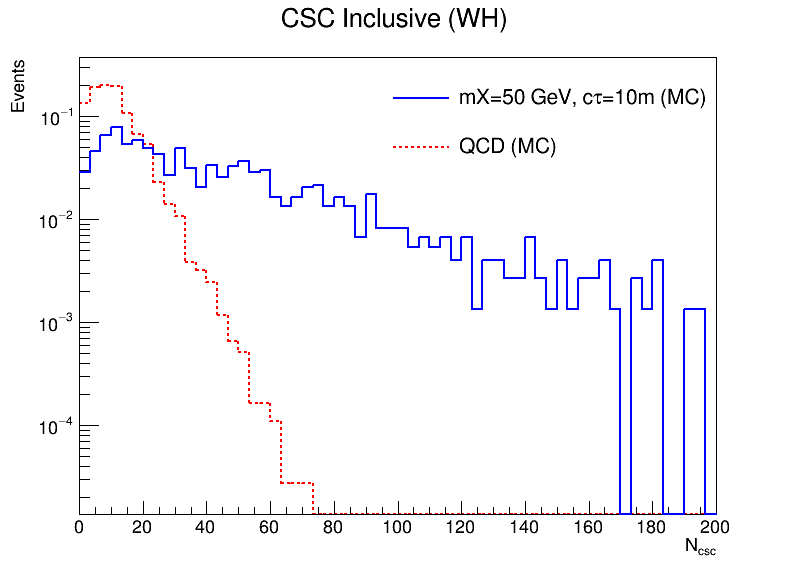

In [38]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c = rt.TCanvas('c','c', 800, 600)
h = {}
# h['nCsc_m50ct1m'] = create_TH1D(nCsc['m50ct1m'], axis_title=['nCsc_m50ct1m', 'Events'], name='nCsc_m50ct1m', binning=[150,0,500])
# h['nCsc_m50ct1m'].SetLineColor(4)

h['nCsc_m50ct10m'] = create_TH1D(nCsc['m50ct10m'], axis_title=['nCsc_m50ct10m', 'Events'], name='nCsc_m50ct10m', binning=[150,0,500])
h['nCsc_m50ct10m'].SetLineColor(4)
# h['nCsc_m50ct10m'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500])
h['nCsc_wjets'].SetLineColor(2)
h['nCsc_wjets'].SetLineStyle(2)


# h['nCsc_zeroBias'] = create_TH1D(nCsc['zeroBias'], axis_title=['nCsc_zeroBias', 'Events'], name='nCsc_zeroBias', binning=[150,0,500])
# h['nCsc_zeroBias'].SetLineColor(2)
# h['nCsc_zeroBias'].SetLineStyle(1)

c.SetLogy()

# h['nCsc_m50ct1m'].Scale(1.0/h['nCsc_m50ct1m'].Integral())
h['nCsc_m50ct10m'].Scale(1.0/h['nCsc_m50ct10m'].Integral())

h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())
# h['nCsc_zeroBias'].Scale(1.0/h['nCsc_zeroBias'].Integral())


# h['nCsc_m50ct1m'].SetLineWidth(1)
h['nCsc_m50ct10m'].SetLineWidth(2)

h['nCsc_wjets'].SetLineWidth(2)
# h['nCsc_zeroBias'].SetLineWidth(2)

# h['nCsc_m50ct1m'].GetXaxis().SetRangeUser(0,200)
h['nCsc_m50ct10m'].GetXaxis().SetRangeUser(0,200)

h['nCsc_wjets'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("CSC Inclusive (WH)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
# h['nCsc_m50ct1m'].Draw('histo+same')
h['nCsc_m50ct10m'].Draw('histo+same')
# h['nCsc_zeroBias'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['nCsc_m50ct10m'], "mX=50 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias'], "Zero Bias" , "L");

legend.Draw();

c.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## *N<sub>CSC</sub> Histogram with ME 1/1 Hits Removed*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: nCsc_wjets_noME11 (Potential memory leak).


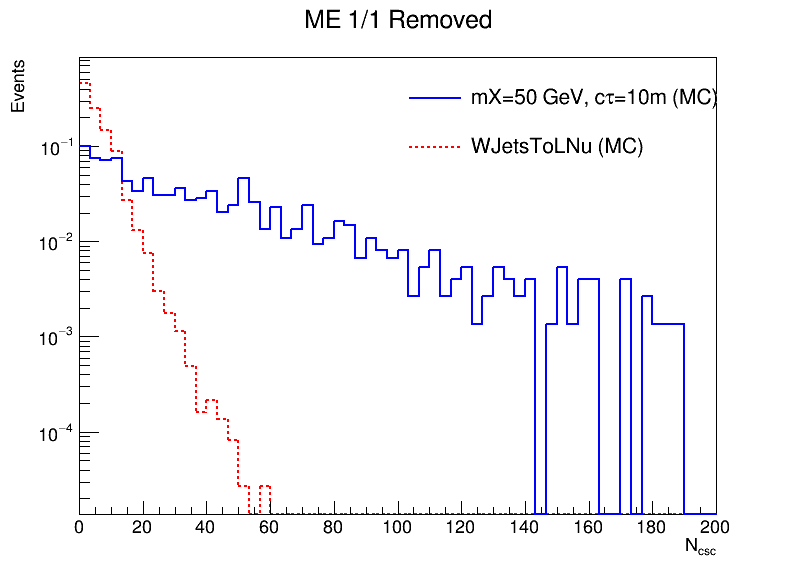

In [41]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c2 = rt.TCanvas('c2','c2', 800, 600)

h['nCsc_m50ct10m_noME11'] = create_TH1D(nCsc_removal['m50ct10m']['ME_11'], axis_title=['nCsc_m50ct10m_noME11', 'Events'], name='nCsc_m50ct10m_noME11', binning=[150,0,500])
h['nCsc_m50ct10m_noME11'].SetLineColor(4)

h['nCsc_wjets_noME11'] = create_TH1D(nCsc_removal['WJetsToLNu']['ME_11'], axis_title=['nCsc_wjets_noME11', 'Events'], name='nCsc_wjets_noME11', binning=[150,0,500])
h['nCsc_wjets_noME11'].SetLineColor(2)
h['nCsc_wjets_noME11'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c2.SetLogy()

h['nCsc_m50ct10m_noME11'].Scale(1.0/h['nCsc_m50ct10m_noME11'].Integral())
h['nCsc_wjets_noME11'].Scale(1.0/h['nCsc_wjets_noME11'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['nCsc_m50ct10m_noME11'].SetLineWidth(2)
h['nCsc_wjets_noME11'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['nCsc_m50ct10m_noME11'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME11'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME11'].SetStats(0)
h['nCsc_wjets_noME11'].SetTitle("ME 1/1 Removed")
h['nCsc_wjets_noME11'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME11'].Draw('histo')
h['nCsc_m50ct10m_noME11'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['nCsc_m50ct10m_noME11'], "mX=50 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets_noME11'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c2.Draw()

# c2.SaveAs("ncsc_noME11_mc_zeroBias.pdf")
# c2.SaveAs("ncsc_noME11_mc_zeroBias.C")

## *N<sub>CSC</sub> Threshold ROC Curves*

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


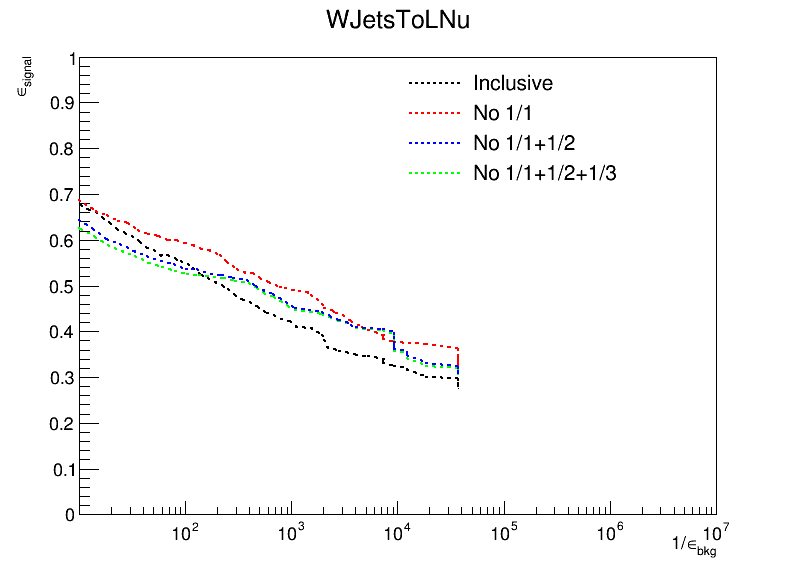

In [43]:
# Creates ROC curves for the signal efficiency of the m50ct1m signal sample against the ZeroBias samples
# using nCsc thresholds

c3 = rt.TCanvas('c3','c3', 800, 600)

h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m50ct1m']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m50ct1m']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m50ct1m']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m50ct1m']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c3.SetLogx()

h['roc_curve_noCluster'].SetTitle('WJetsToLNu')


h['roc_curve_noCluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)

h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 10000000)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)

h['roc_curve_noCluster'].Draw()
h['roc_curve_clean_noCluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Inclusive", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "No 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "No 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "No 1/1+1/2+1/3", 'l');


legend.Draw();

c3.Draw()

# k-means Clustering

In [44]:
# k-means clustering algorithm
# For more information, check out https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

MAX_ITERATIONS = 100
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    return np.array_equal(oldCentroids,centroids) and iterations > 0


# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids, i):
    #print 1
    #for i in dataSet:
    dist = cdist( dataSet, centroids, metric='euclidean' )
    
    #print dist
    if i < 1:
        dist[dist>1.0] = 999
    elif i < 2:
        dist[dist>0.8] = 999
    else:
        dist[dist>0.4] = 999
        
    #print dist
    #print np.argmin(dist, axis=1)
    return np.argmin(dist, axis=1)
    #print dataSet
    # For each element in the dataset, chose the closest centroid. 
    # Make that centroid the element's label.

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.average(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getRandomCentroids():
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    even_list = np.linspace(-4.0, 4.0, num=5)
    centers  = np.empty((0,2))
    for i in even_list:
        for j in even_list:
            #print i,j
            new_arr = np.array([i,j])
            centers = np.append(centers,[new_arr],axis=0)
    #print centers
    return centers
    #return np.mgrid[-4:4.1:2, -4:4.1:2].reshape(2,-1).T
    #return np.random.rand(k,numFeatures)

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

In [45]:
n_c_total = {}
n_c_hits_12 = {}
n_c_hits_13 = {}

delta_t_max_freq = {}
delta_t_max = {}
# delta_t_average = {}

def sel_clustering(station, model): # Add (, model) for gen level info
        eta_data_sel = data_sel[station][0]
        t_data_sel = data_sel[station][1]
        z_data_sel = data_sel[station][2]
        if station == 2 or station == -2:
            x_data_sel = data_sel[station][3]
            y_data_sel = data_sel[station][4]
        else:
            x_data_sel = np.zeros(len(eta_data_sel))
            y_data_sel = np.zeros(len(eta_data_sel))
            
        test_dataset = np.vstack((eta_data_sel, t_data_sel)).T
        
        # Centroid_constituents is a list of all of the hits corresponding to each centroid
        # etaPhi_labels is a list of the centroids corresponding to each hit
        centroids, centroid_constituents = kmeans(test_dataset, 25)
        etaPhi_labels = getLabels(test_dataset, centroids, 2)
        
#         print(centroid_constituents)
#         print(etaPhi_labels)
        
        # Determines nCsc for all clusters
        total_hits = 0
        for cc in centroid_constituents:
            if cc > 3:
                total_hits += cc
        
        n_c_total[data_type][station].append(total_hits)
        
        # Separates and counts hits in ME 1/2 and ME 1/3
        z_final = np.array([])
        t_final = np.array([])
        r_final_123_sel = np.array([])
        cluster_freq = np.array([])
        for cluster in np.unique(etaPhi_labels):
            if np.count_nonzero(etaPhi_labels == cluster) > 3:
                if cluster != 0:
                    z_final = np.append(z_final, z_data_sel[etaPhi_labels == cluster])
                    x_final_123_sel = x_data_sel[etaPhi_labels == cluster]
                    y_final_123_sel = y_data_sel[etaPhi_labels == cluster]
                    r_final_123_sel = np.append(r_final_123_sel, np.sqrt(x_final_123_sel**2+y_final_123_sel**2))
                    cluster_freq = np.append(cluster_freq, centroid_constituents[cluster])
                    t_final = np.append(t_final, t_data_sel[etaPhi_labels == cluster])
                

        if t_final.shape[0] == 0:
#             t_final = np.append(t_final, np.nan)
            delta_t_max[data_type][station].append(np.nan)
            delta_t_max_freq[data_type][station].append(np.nan)
            
        else:
            max_cluster_freq = np.amax(cluster_freq)
            delta_t_max_freq[data_type][station].append(max_cluster_freq)
            t_cluster = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])]
            if len(t_cluster) != 0:
                if etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])][0] != 0:
#                     max_t = np.max(t_cluster)
#                     min_t = np.min(t_cluster)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
                    
                else:
                    t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
#                     max_t = np.max(t_cluster_prime)
#                     min_t = np.min(t_cluster_prime)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
#                     if delta_t > 1:
# #                         print(max_t)
# #                         print(min_t)
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])])
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])])
#                         print(max_cluster_freq)
#                         print(etaPhi_labels)
            else:
                t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
                max_t = np.max(t_cluster_prime)
                min_t = np.min(t_cluster_prime)
                delta_t = np.mean(t_cluster)
                delta_t_max[data_type][station].append(delta_t)

        
        if r_final_123_sel.shape[0] == 0:
            n_c_hits_12[data_type][station].append(0.0)
            n_c_hits_13[data_type][station].append(0.0)
        else:
            sel_counter_12 = 0
            sel_counter_13 = 0
            for hit_r in r_final_123_sel:
                if hit_r < 465 and hit_r > 275:
                    sel_counter_12 += 1
                if hit_r < 695.5 and hit_r > 505.5:
                    sel_counter_13 += 1
            n_c_hits_12[data_type][station].append(sel_counter_12)
            n_c_hits_13[data_type][station].append(sel_counter_13)
#         print(t_data_sel)
#         if t_final.shape[0] == 0:
#             delta_t_max[data_type][station].append(0.0)
#             delta_t_average[data_type][station].append(0.0)
#         else:
#             if np.absolute(np.amax(t_final)) > np.absolute(np.amin(t_final)):
#                 delta_t_max[data_type][station].append(np.amax(t_final))
#             else:
#                 delta_t_max[data_type][station].append(np.amin(t_final))
#             delta_t_average[data_type][station].append(np.sum(t_final)/len(t_final))

In [52]:
print('Start: '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
for data_type in data_trees.keys():
    n_c_total[data_type] = {}
    n_c_total[data_type]['total'] = []
    
    delta_t_max[data_type] = {}
    delta_t_max[data_type]['total'] = []
    
    delta_t_max_freq[data_type] = {}

#     delta_t_average[data_type] = {}
#     delta_t_average[data_type]['total'] = []
    
    n_c_hits_12[data_type] = {}
    n_c_hits_13[data_type] = {}

    csc_sections = [1,2,3,4,5, -1, -2, -3, -4, -5]
    for section in csc_sections:
        n_c_total[data_type][section] = []
        n_c_hits_12[data_type][section] = []
        n_c_hits_13[data_type][section] = []
        
        delta_t_max[data_type][section] = []
        delta_t_max_freq[data_type][section] = []
        
#         delta_t_average[data_type][section] = []

            
    for sel_event in range(csc_eta[data_type].shape[0]):

        data_sel = {}

        # 1/1 if 568 < zPos < 632:
        hits_pos1_sel = np.logical_and(csc_z[data_type][sel_event]<632, csc_z[data_type][sel_event]>568)
        hits_neg1_sel = np.logical_and(csc_z[data_type][sel_event]>-632, csc_z[data_type][sel_event]<-568)
        data_sel[1] = (csc_eta[data_type][sel_event][hits_pos1_sel], csc_t[data_type][sel_event][hits_pos1_sel], csc_z[data_type][sel_event][hits_pos1_sel])
        data_sel[-1] = (csc_eta[data_type][sel_event][hits_neg1_sel], csc_t[data_type][sel_event][hits_neg1_sel], csc_z[data_type][sel_event][hits_neg1_sel])


        # 1/2 and 1/3 elif 663 < zPos < 724:
        hits_pos2_sel = np.logical_and(csc_z[data_type][sel_event]<724, csc_z[data_type][sel_event]>663)
        hits_neg2_sel = np.logical_and(csc_z[data_type][sel_event]>-724, csc_z[data_type][sel_event]<-663)
        data_sel[2] = (csc_eta[data_type][sel_event][hits_pos2_sel], csc_t[data_type][sel_event][hits_pos2_sel], csc_z[data_type][sel_event][hits_pos2_sel], csc_x[data_type][sel_event][hits_pos2_sel], csc_y[data_type][sel_event][hits_pos2_sel])
        data_sel[-2] = (csc_eta[data_type][sel_event][hits_neg2_sel], csc_t[data_type][sel_event][hits_neg2_sel], csc_z[data_type][sel_event][hits_neg2_sel], csc_x[data_type][sel_event][hits_neg2_sel], csc_y[data_type][sel_event][hits_neg2_sel])


        # 2/1 and 2/2 elif 791 < zPos < 849.5:
        hits_pos3_sel = np.logical_and(csc_z[data_type][sel_event]<849.5, csc_z[data_type][sel_event]>791)
        hits_neg3_sel = np.logical_and(csc_z[data_type][sel_event]>-849.5, csc_z[data_type][sel_event]<-791)
        data_sel[3] = (csc_eta[data_type][sel_event][hits_pos3_sel], csc_t[data_type][sel_event][hits_pos3_sel], csc_z[data_type][sel_event][hits_pos3_sel])
        data_sel[-3] = (csc_eta[data_type][sel_event][hits_neg3_sel], csc_t[data_type][sel_event][hits_neg3_sel], csc_z[data_type][sel_event][hits_neg3_sel])


        # 3/1 and 3/2 elif 911.5 < zPos < 970:
        hits_pos4_sel = np.logical_and(csc_z[data_type][sel_event]<970, csc_z[data_type][sel_event]>911.5)
        hits_neg4_sel = np.logical_and(csc_z[data_type][sel_event]>-970, csc_z[data_type][sel_event]<-911.5)
        data_sel[4] = (csc_eta[data_type][sel_event][hits_pos4_sel], csc_t[data_type][sel_event][hits_pos4_sel], csc_z[data_type][sel_event][hits_pos4_sel])
        data_sel[-4] = (csc_eta[data_type][sel_event][hits_neg4_sel], csc_t[data_type][sel_event][hits_neg4_sel], csc_z[data_type][sel_event][hits_neg4_sel])


        # 4/1 and 4/2 elif 1002 < zPos < 1060.5:
        hits_pos5_sel = np.logical_and(csc_z[data_type][sel_event]<1060.5, csc_z[data_type][sel_event]>1002.5)
        hits_neg5_sel = np.logical_and(csc_z[data_type][sel_event]>-1060.5, csc_z[data_type][sel_event]<-1002.5)
        data_sel[5] = (csc_eta[data_type][sel_event][hits_pos5_sel], csc_t[data_type][sel_event][hits_pos5_sel], csc_z[data_type][sel_event][hits_pos5_sel])
        data_sel[-5] = (csc_eta[data_type][sel_event][hits_neg5_sel], csc_t[data_type][sel_event][hits_neg5_sel], csc_z[data_type][sel_event][hits_neg5_sel])

        sel_clustering(1, data_type)
        sel_clustering(-1, data_type)
        sel_clustering(2, data_type)
        sel_clustering(-2, data_type)
        sel_clustering(3, data_type)
        sel_clustering(-3, data_type)
        sel_clustering(4, data_type)
        sel_clustering(-4, data_type)
        sel_clustering(5, data_type)
        sel_clustering(-5, data_type)

        ncsc_temp = 0.0
        t_max_temp = np.array([])
        t_freq_temp = []
        
        for x in csc_sections:
            ncsc_temp += n_c_total[data_type][x][-1]
            t_freq_temp.append(delta_t_max_freq[data_type][x][-1])
            t_max_temp = np.append(t_max_temp, delta_t_max[data_type][x][-1])


        n_c_total[data_type]['total'].append(ncsc_temp)
        
        if len(t_freq_temp) == len(csc_sections):
            t_freq_temp = np.nan_to_num(t_freq_temp).astype(int)
            max_freq = np.amax(t_freq_temp)
            max_freq_index = np.where(t_freq_temp == max_freq)
#             print(t_max_temp[max_freq_index][0])
#             if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                 max_delT = np.amax(t_max_temp[max_freq_index])
#             else:
#                 max_delT = np.amin(t_max_temp[max_freq_index])
                
            delta_t_max[data_type]['total'].append(t_max_temp[max_freq_index][0])
            
#             if len((t_max_temp[max_freq_index])) != len(csc_sections):
#                 if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                     max_delPhi = np.amax(t_max_temp[max_freq_index])
#                 else:
#                     max_delPhi = np.amin(t_max_temp[max_freq_index])
#                 delta_t_max[data_type]['total'].append(max_delPhi)
#             else:
#                 delta_t_max[data_type]['total'].append(np.nan)
        else:
            print("Function error")
                
        if (sel_event % 1000) == 0:
            print(str(sel_event) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            
#         if np.absolute(np.amax(t_avg_temp)) > np.absolute(np.amin(t_avg_temp)):
#             delta_t_max[data_type]['total'].append(np.amax(t_avg_temp))
#         else:
#             delta_t_max[data_type]['total'].append(np.amin(t_avg_temp))
            
#         delta_t_average[data_type]['total'].append(np.sum(t_avg_temp)/len(t_avg_temp))        
#         break
        
    print(data_type + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-07-31 17:12:34.671644-07:00
0: 2019-07-31 17:12:34.686476-07:00
m50ct1m: 2019-07-31 17:12:40.525941-07:00
0: 2019-07-31 17:12:40.541140-07:00
m50ct10m: 2019-07-31 17:12:49.825212-07:00
0: 2019-07-31 17:12:49.835530-07:00
m975ct1m: 2019-07-31 17:12:49.935745-07:00
0: 2019-07-31 17:12:49.949106-07:00
m975ct10m: 2019-07-31 17:12:54.784175-07:00
0: 2019-07-31 17:12:54.795180-07:00
1000: 2019-07-31 17:13:05.488177-07:00
2000: 2019-07-31 17:13:16.177009-07:00
3000: 2019-07-31 17:13:26.946311-07:00
4000: 2019-07-31 17:13:37.661940-07:00
5000: 2019-07-31 17:13:48.617969-07:00
6000: 2019-07-31 17:13:59.510162-07:00
7000: 2019-07-31 17:14:10.310147-07:00
8000: 2019-07-31 17:14:21.094661-07:00
9000: 2019-07-31 17:14:31.831416-07:00
10000: 2019-07-31 17:14:42.530643-07:00
11000: 2019-07-31 17:14:53.258984-07:00
12000: 2019-07-31 17:15:04.006501-07:00
13000: 2019-07-31 17:15:14.659688-07:00
14000: 2019-07-31 17:15:25.845942-07:00
15000: 2019-07-31 17:15:36.763890-07:00
16000: 2019-07-31

In [53]:
nCsc_cluster = {}
for data_type in data_trees.keys():
    nCsc_cluster[data_type] = {}
    nCsc_cluster[data_type]['csc_inclusive'] = np.array(n_c_total[data_type]['total'])
    nCsc_cluster[data_type]['csc_noME11'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]))
    nCsc_cluster[data_type]['csc_noME112'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_hits_12[data_type][2]) + np.array(n_c_hits_12[data_type][-2]))
    nCsc_cluster[data_type]['csc_noME1123'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_total[data_type][2]) + np.array(n_c_total[data_type][-2]))

In [54]:
# ROC Curve for ggH/QCD/ZeroBias Samples: nCsc 

eff_ncsc = {}
rejection_power = {}
ncsc_var_x = np.array([])

for data_type in data_trees.keys():
    eff_ncsc[data_type] = {}
    
    eff_ncsc[data_type]['cluster'] = {}
    eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.array([])
    
    eff_ncsc[data_type]['noCluster'] = {}
    eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
    for hit_thresh in range(0, 200):
        ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        # Clustering ROCs
        eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['cluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_inclusive'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_inclusive']))
        eff_ncsc[data_type]['cluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME11'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME11']))
        eff_ncsc[data_type]['cluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME112'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME112']))
        eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME1123'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME1123']))

       # No-Clustering ROCs
        eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
        eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
        eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
        eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))
    
    # Rejection power calculation
    rejection_power[data_type] = {}
    rejection_power[data_type]['cluster'] = {}
    rejection_power[data_type]['noCluster'] = {}
    
    # Clustering
    rejection_power[data_type]['cluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_inclusive']))
    rejection_power[data_type]['cluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME11']))
    rejection_power[data_type]['cluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME112']))
    rejection_power[data_type]['cluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME1123']))
    # No clustering
    rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
    rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
    rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
    rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


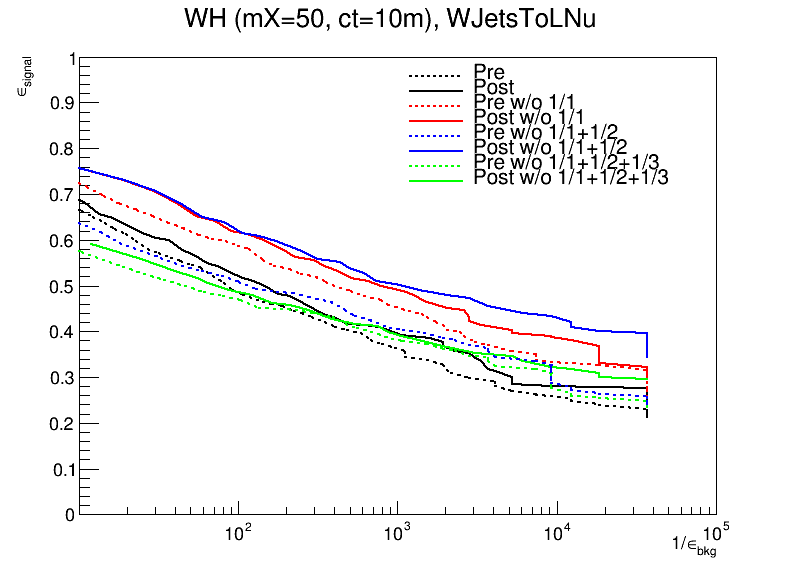

In [62]:
c4 = rt.TCanvas('c4','c4', 800, 600)

h['roc_curve_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_inclusive'], eff_ncsc['m50ct10m']['cluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m50ct10m']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_clean_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME11'], eff_ncsc['m50ct10m']['cluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m50ct10m']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_res_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME1123'], eff_ncsc['m50ct10m']['cluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m50ct10m']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_med_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME112'], eff_ncsc['m50ct10m']['cluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m50ct10m']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c4.SetLogx()
# c3.SetLogy()

h['roc_curve_noCluster'].SetTitle('WH (mX=50, ct=10m), WJetsToLNu')

h['roc_curve_cluster'].SetLineWidth(2)
h['roc_curve_noCluster'].SetLineWidth(2)

h['roc_curve_clean_cluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)

h['roc_curve_res_cluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)

h['roc_curve_med_cluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)

h['roc_curve_cluster'].SetLineColor(1)
h['roc_curve_cluster'].SetLineStyle(1)
h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_clean_cluster'].SetLineColor(2)
h['roc_curve_clean_cluster'].SetLineStyle(1)
h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_cluster'].SetLineColor(3)
h['roc_curve_res_cluster'].SetLineStyle(1)
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_cluster'].SetLineColor(4)
h['roc_curve_med_cluster'].SetLineStyle(1)
h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 100000)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)



h['roc_curve_noCluster'].Draw()
h['roc_curve_cluster'].Draw('same')
h['roc_curve_clean_cluster'].Draw('same')
h['roc_curve_clean_noCluster'].Draw('same')
h['roc_curve_res_cluster'].Draw('same')
h['roc_curve_med_cluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Pre", 'l');
legend.AddEntry( h['roc_curve_cluster'], "Post", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "Pre w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_clean_cluster'], "Post w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "Pre w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_med_cluster'], "Post w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "Pre w/o 1/1+1/2+1/3", 'l');
legend.AddEntry( h['roc_curve_res_cluster'], "Post w/o 1/1+1/2+1/3", 'l');


legend.Draw();

c4.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Warning in <TROOT::Append>: Replacing existing TH1: nCsc_m50ct10m_noME11_cluster (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nCsc_wjets_noME11_cluster (Potential memory leak).


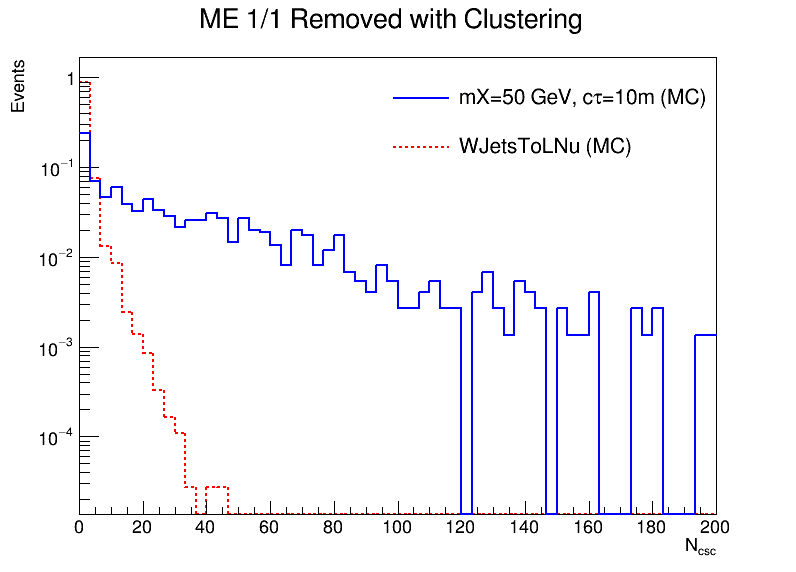

In [61]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c5 = rt.TCanvas('c5','c5', 800, 600)

h['nCsc_m50ct10m_noME11_cluster'] = create_TH1D(nCsc_cluster['m50ct10m']['csc_noME11'], axis_title=['nCsc_m50ct10m_noME11_cluster', 'Events'], name='nCsc_m50ct10m_noME11_cluster', binning=[150,0,500])
h['nCsc_m50ct10m_noME11_cluster'].SetLineColor(4)

h['nCsc_wjets_noME11_cluster'] = create_TH1D(nCsc_cluster['WJetsToLNu']['csc_noME11'], axis_title=['nCsc_wjets_noME11_cluster', 'Events'], name='nCsc_wjets_noME11_cluster', binning=[150,0,500])
h['nCsc_wjets_noME11_cluster'].SetLineColor(2)
h['nCsc_wjets_noME11_cluster'].SetLineStyle(2)

c5.SetLogy()

h['nCsc_m50ct10m_noME11_cluster'].Scale(1.0/h['nCsc_m50ct10m_noME11_cluster'].Integral())
h['nCsc_wjets_noME11_cluster'].Scale(1.0/h['nCsc_wjets_noME11_cluster'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['nCsc_m50ct10m_noME11_cluster'].SetLineWidth(2)
h['nCsc_wjets_noME11_cluster'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['nCsc_m50ct10m_noME11_cluster'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME11_cluster'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME11_cluster'].SetStats(0)
h['nCsc_wjets_noME11_cluster'].SetTitle("ME 1/1 Removed with Clustering")
h['nCsc_wjets_noME11_cluster'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME11_cluster'].Draw('histo')
h['nCsc_m50ct10m_noME11_cluster'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['nCsc_m50ct10m_noME11_cluster'], "mX=50 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets_noME11_cluster'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c5.Draw()

# c2.SaveAs("ncsc_noME11_mc_zeroBias.pdf")
# c2.SaveAs("ncsc_noME11_mc_zeroBias.C")